## Importing Libraries


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing


In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation image preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break


tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     4.  ]
   [  0.     0.     4.  ]
   [  0.     0.     4.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     2.  ]
   [  0.     0.     2.  ]
   [  0.     0.     3.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  1.     0.     0.  ]
   [  1.     0.     0.  ]
   [  1.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

## Building Model

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout 
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32, kernel_size=3,padding='same', activation='relu', input_shape=[128,128,3])) 
model.add(Conv2D(filters=32, kernel_size=3,activation='relu')) 
model.add(MaxPool2D (pool_size=2, strides=2))

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64, kernel_size=3,padding='same', activation='relu', input_shape=[128,128,3])) 
model.add(Conv2D(filters=64, kernel_size=3,activation='relu')) 
model.add(MaxPool2D (pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters=128, kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,activation='relu')) 
model.add(MaxPool2D (pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=256, kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3,activation='relu')) 
model.add(MaxPool2D (pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=512, kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3,activation='relu')) 
model.add(MaxPool2D (pool_size=2, strides=2))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())



In [15]:
model.add(Dense(units=1500,activation='relu'))



In [16]:
model.add(Dropout(0.40))

In [17]:
#Output Layer 
model.add(Dense(units=38,activation='softmax'))

Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

Model Training

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2865s 1s/step - accuracy: 0.4207 - loss: 2.0426 - val_accuracy: 0.8463 - val_loss: 0.4899
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2686s 1s/step - accuracy: 0.8416 - loss: 0.4993 - val_accuracy: 0.8774 - val_loss: 0.3727
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 9661s 4s/step - accuracy: 0.9092 - loss: 0.2846 - val_accuracy: 0.9380 - val_loss: 0.1865
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2733s 1s/step - accuracy: 0.9344 - loss: 0.2028 - val_accuracy: 0.9368 - val_loss: 0.2029
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2710s 1s/step - accuracy: 0.9530 - loss: 0.1443 - val_accuracy: 0.9568 - val_loss: 0.1382
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2754s 1s/step - accuracy: 0.9639 - loss: 0.1123 - val_accuracy: 0.9388 - val_loss: 0.1948
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2774s 1s/step - accuracy: 0.9699 - loss: 0.0918 - val_accuracy: 0.9542 - val_loss: 0.1480
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2758s 1s/step - accuracy: 0.9746 -

## model evaluation

In [21]:
## model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 685s 312ms/step - accuracy: 0.9904 - loss: 0.0310


In [22]:
print(train_loss,train_acc)

0.02735302597284317 0.9912511706352234


In [23]:
## model evaluation on validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 168s 306ms/step - accuracy: 0.9671 - loss: 0.1061


In [24]:
print(val_loss,val_acc)

0.10918543487787247 0.9668222069740295


## Saving Model

In [25]:
model.save("trained_model.keras")

In [26]:
training_history.history

{'accuracy': [0.6170993447303772,
  0.8608009219169617,
  0.9167508482933044,
  0.9397823214530945,
  0.9557721018791199,
  0.9648054838180542,
  0.9720748066902161,
  0.9760153889656067,
  0.978988528251648,
  0.9816914200782776],
 'loss': [1.2915159463882446,
  0.4365447759628296,
  0.25883132219314575,
  0.18377958238124847,
  0.13481390476226807,
  0.10660704970359802,
  0.08449151366949081,
  0.0723189264535904,
  0.06518218666315079,
  0.056245170533657074],
 'val_accuracy': [0.8463464379310608,
  0.8774186372756958,
  0.9379695057868958,
  0.9367744326591492,
  0.9568063020706177,
  0.9388231039047241,
  0.954245388507843,
  0.9540177583694458,
  0.9716594815254211,
  0.9668222069740295],
 'val_loss': [0.48989832401275635,
  0.3727293908596039,
  0.18651077151298523,
  0.20289018750190735,
  0.13820616900920868,
  0.19483985006809235,
  0.14801064133644104,
  0.16064245998859406,
  0.09115444868803024,
  0.10918547213077545]}

In [27]:
#Recording history in JSON
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

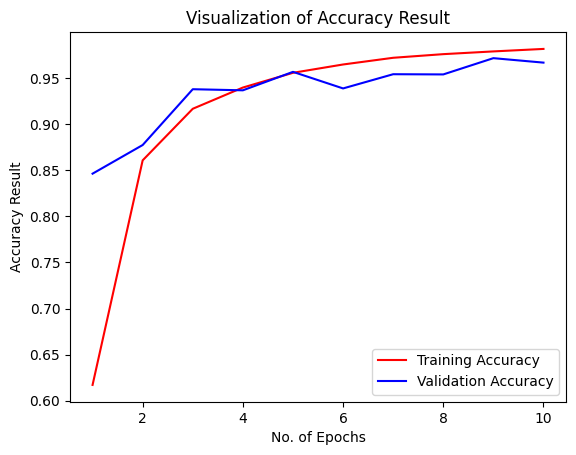

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'],color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color='blue', label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [32]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [34]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 151s 273ms/step


(array([[1.0000000e+00, 8.1747803e-10, 7.4645975e-12, ..., 1.1894783e-16,
         3.9368440e-17, 5.1294446e-17],
        [9.9999988e-01, 1.5324262e-09, 2.2522308e-09, ..., 1.5156452e-13,
         8.2174368e-15, 3.0309925e-16],
        [1.0000000e+00, 3.2273858e-12, 5.0472270e-12, ..., 5.6535032e-18,
         3.7693546e-16, 2.0158977e-16],
        ...,
        [4.0916115e-09, 6.4615145e-12, 2.2558173e-09, ..., 8.2285456e-11,
         6.2721300e-10, 9.9992788e-01],
        [2.8361791e-09, 6.0791524e-12, 6.0243917e-09, ..., 2.4776079e-09,
         6.8851911e-09, 9.9998176e-01],
        [4.4507353e-14, 1.3170695e-16, 9.4042121e-15, ..., 1.1081624e-15,
         1.3796868e-13, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [35]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [36]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.93      0.96       504
                                 Apple___Black_rot       0.98      1.00      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.96      0.97       440
                                   Apple___healthy       0.93      0.96      0.94       502
                               Blueberry___healthy       0.96      1.00      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.93      0.92       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.96      0.

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[468,   2,   1, ...,   0,   0,   0],
       [  0, 495,   0, ...,   0,   0,   0],
       [  0,   0, 424, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 480,   0,   0],
       [  0,   0,   0, ...,   0, 443,   0],
       [  0,   0,   1, ...,   0,   0, 460]], dtype=int64)

## Confusion Matrix Visualization

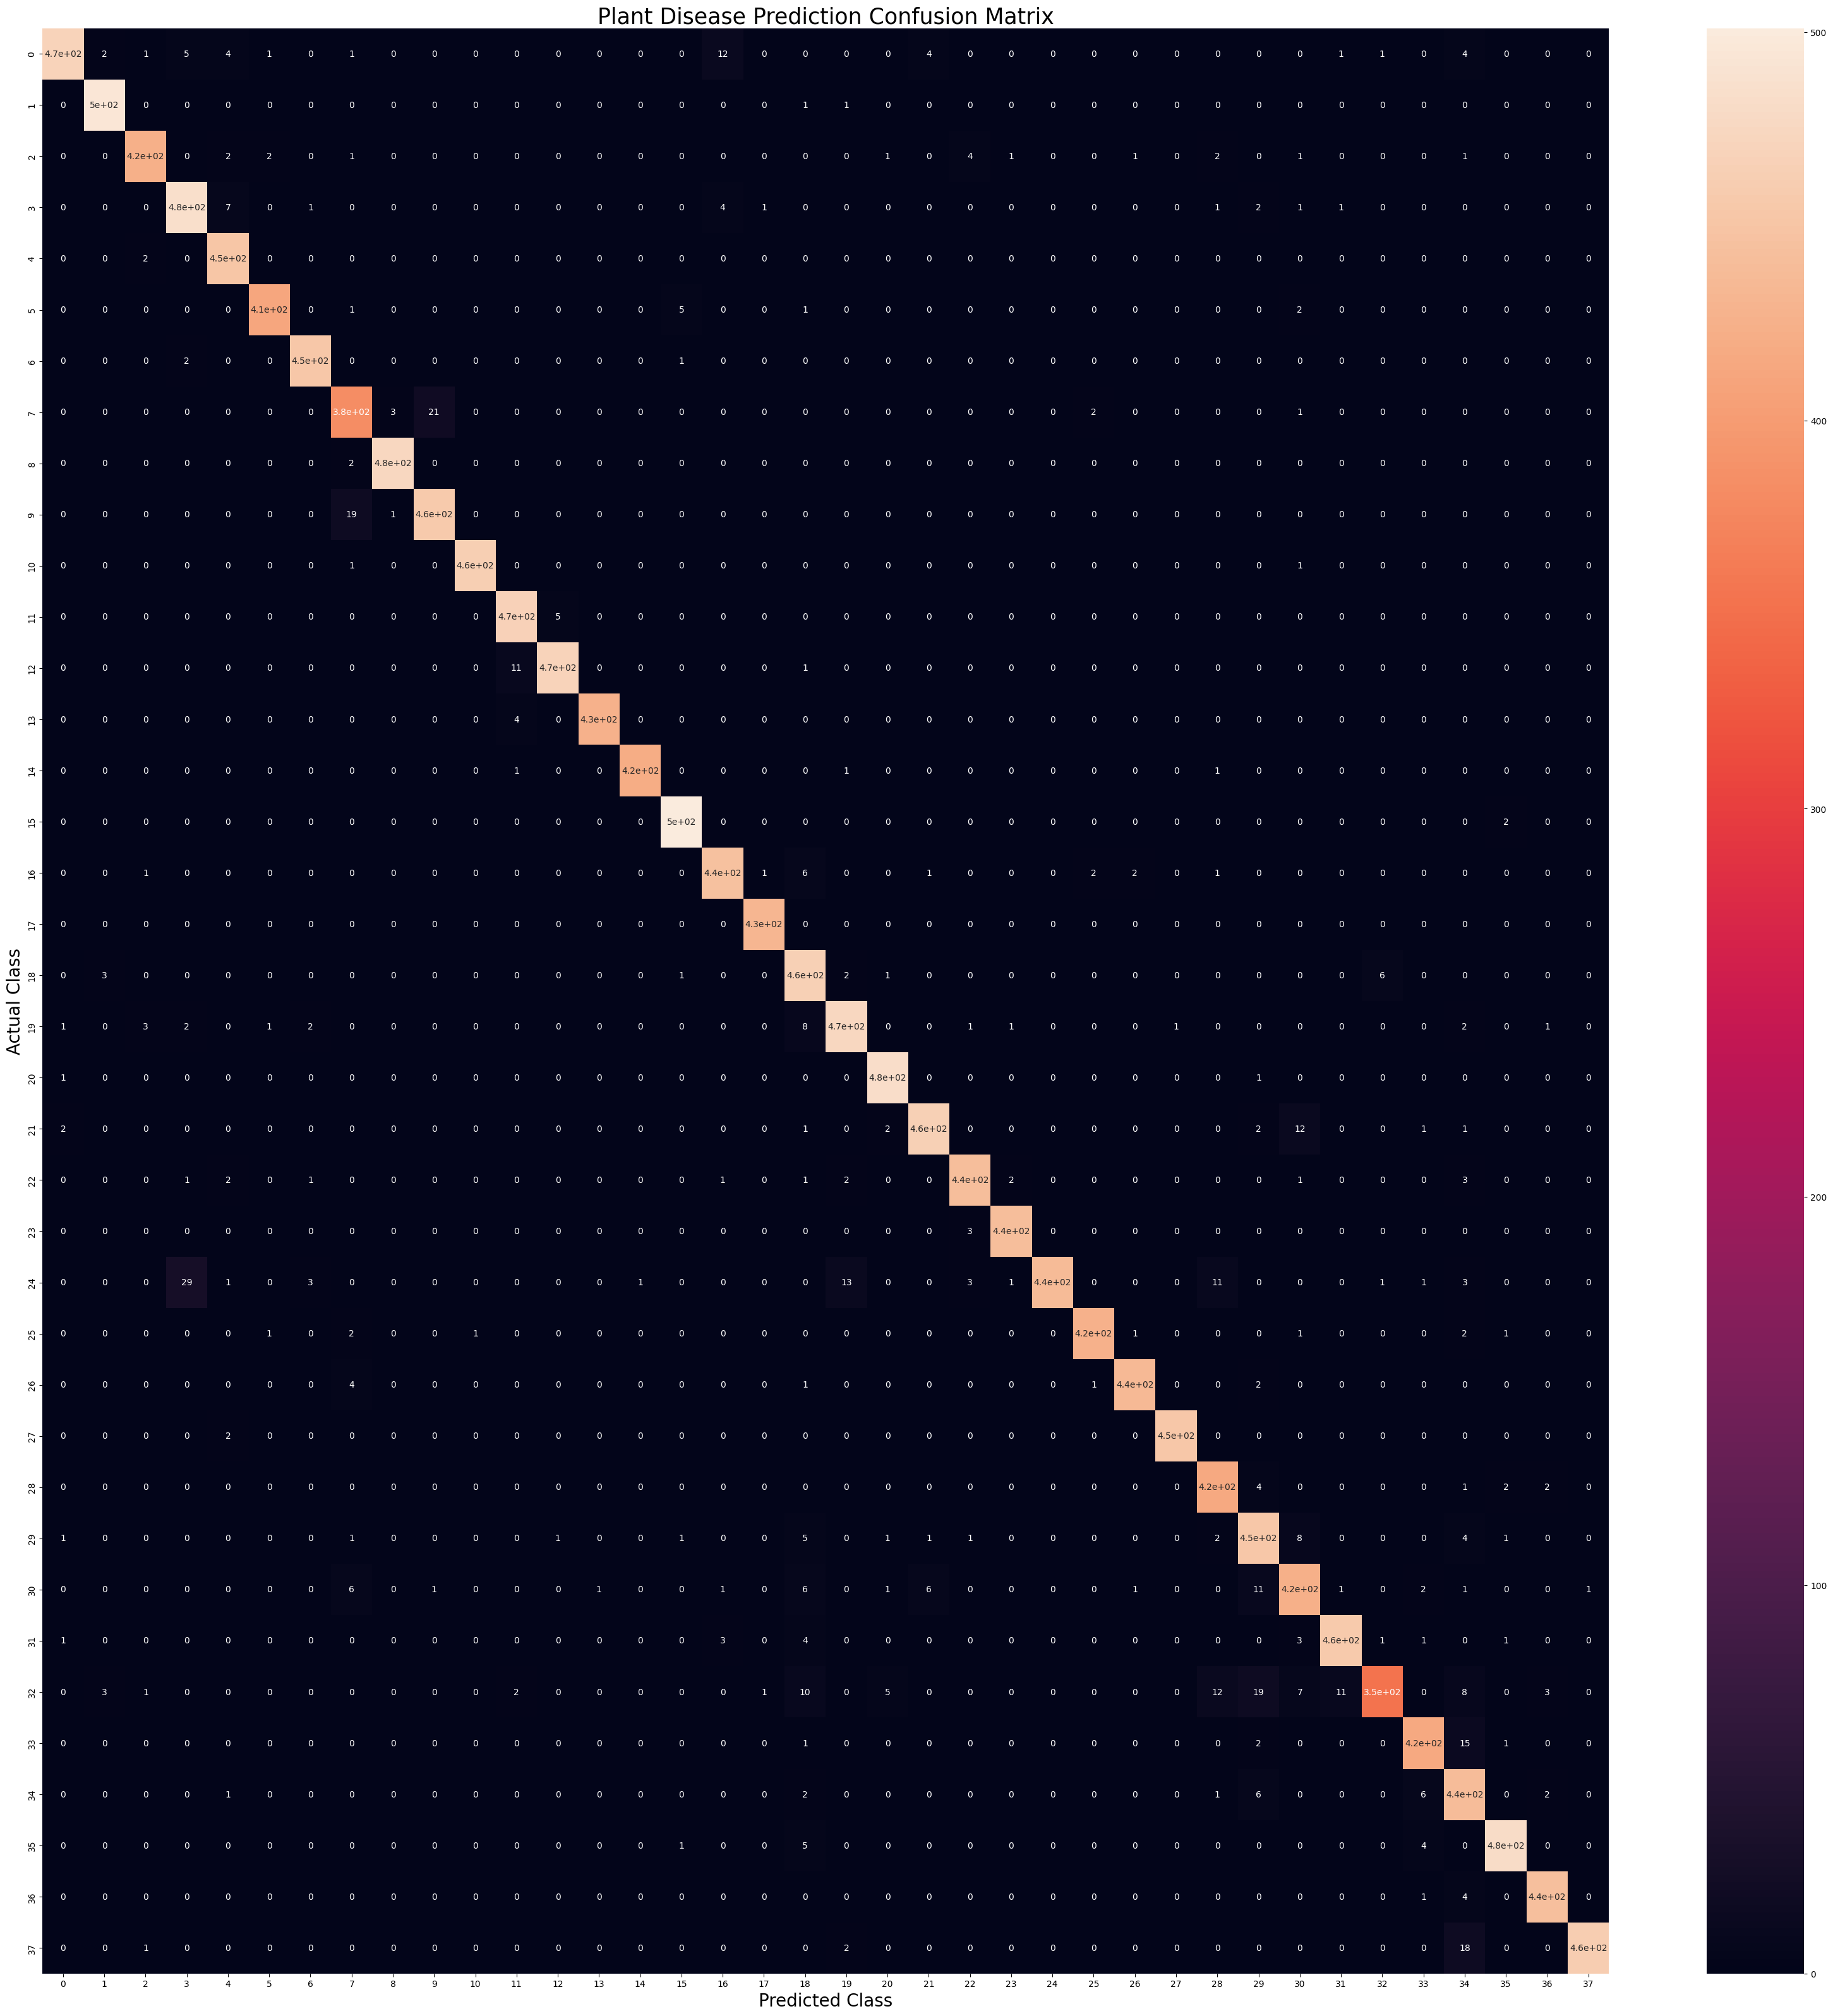

In [47]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True, annot_kws={'size':10})
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()